In [1]:
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.corpus import stopwords
import nltk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk import flatten
import pandas as pd
import string
import numpy as np
import gensim.downloader as api
from gensim.matutils import softcossim 
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.matutils import softcossim 
from gensim.utils import simple_preprocess
from nltk.translate.bleu_score import sentence_bleu

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [29]:
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

In [2]:

df = pd.read_csv("./data/articles1.csv")
firstBatch = df.to_dict()
firstBatch = firstBatch['content']
stopwords = set(stopwords.words('english'))

In [3]:
model= Doc2Vec.load("d2v.model")

In [14]:
tagged_data = []
for j, entireDoc in firstBatch.items():
    #makes a list of sentences
    sentencesInDoc = sent_tokenize(entireDoc)
    wordsInDoc = []
    #for each sentences makes a list of useful words (non stop words)
    for sentence in sentencesInDoc:
        sentence = [word.lower() for word in sentence.split() if word.lower() not in stopwords]
        sentence = ' '.join(sentence)
        wordsInDoc.append(sentence)
    for i, sentence in enumerate(wordsInDoc):
        tagged_data.append(TaggedDocument(words=sentence, tags=[str(i)+','+str(j)]))

In [15]:
tagged_data_small = tagged_data[0:152061]

In [16]:
max_epochs = 10
vec_size = 1000
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_data_small)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data_small,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

C:\Users\Michael\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [12]:
softcossimScores = []
unitOverLapScores = []

In [24]:
len(unitOverLapScores)

167

In [37]:

for i in range(10, 30):
    document = firstBatch[i]
    lengthOfSummary = 6
    dictionary = corpora.Dictionary([simple_preprocess(document)])
    similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)
    vector = document2vec(document)
    summary = getSummary(document, lengthOfSummary) 
    summary = sorted(summary, key=summary.__getitem__)
    summaryKmeans = ' '.join(summary)
    summaryCool = _run_article_summary(document)
    summaryCos = summarizeUsingCos(document, lengthOfSummary)
    softcossimScores.append([softcossim(dictionary.doc2bow(simple_preprocess(summaryKmeans)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix), \
                             softcossim(dictionary.doc2bow(simple_preprocess(summaryCool)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix), \
                            softcossim(dictionary.doc2bow(simple_preprocess(summaryCos)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix)])
#     unitOverLapScores.append([unit_overlap(summaryKmeans, document), unit_overlap(summaryCool, document), unit_overlap(summaryCos, document)])
    print(i)
    

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


10


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


11


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


12


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


13


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


14


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


15


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


16


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


17


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


18


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


19


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


20


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


21


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


22


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


23


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


24


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


25


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


26


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


27


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


28
29


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  del sys.path[0]


In [46]:
np.save("softcossimScores.npy", softcossimScores)


In [47]:
softcossim(dictionary.doc2bow(simple_preprocess(document)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix)

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  """Entry point for launching an IPython kernel.


1.0

No handles with labels found to put in legend.


Text(0,0.5,'score')

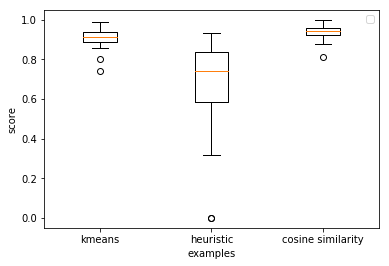

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
kmeans = []
heuristic = []
cossim = []
for i, j, k in softcossimScores:
    kmeans.append(i)
    heuristic.append(j)
    cossim.append(k)
plt.boxplot([kmeans,heuristic,cossim] , labels=['kmeans', 'heuristic', 'cosine similarity'] )
# plt.boxplot(heuristic),
# plt.boxplot(cossim)
plt.legend()

plt.xlabel('examples')
plt.ylabel('score')


In [45]:
printStats(kmeans)
printStats(heuristic)
printStats(cossim)

mean of Kmeans 0.9046196598801515
first quartile 0.8849408231923765
median of kmeans 0.9126490468959834
third quartile 0.9387686461724314
stanford deviation of kmeans 0.04954169466553989
mean of Kmeans 0.6744422674962557
first quartile 0.5861547554789224
median of kmeans 0.7400529444598261
third quartile 0.8366581161013872
stanford deviation of kmeans 0.23991450826650207
mean of Kmeans 0.9358670628291119
first quartile 0.9218049097322403
median of kmeans 0.9419220075649745
third quartile 0.9560234395746197
stanford deviation of kmeans 0.034949392281457194


In [44]:
import numpy as np
def printStats(array):
    print("mean of Kmeans", np.mean(array))
    print("first quartile", np.percentile(array, 25))
    print("median of kmeans", np.median(array))
    print("third quartile", np.percentile(array, 75))
    print("stanford deviation of kmeans",np.std(array))

No handles with labels found to put in legend.


Text(0,0.5,'LSA')

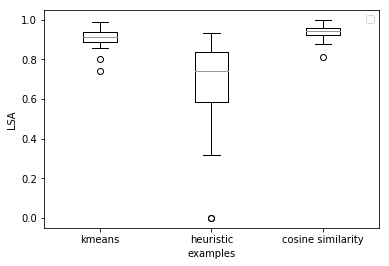

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
kmeans = []
heuristic = []
cossim = []
for i, j, k in softcossimScores:
    kmeans.append(i)
    heuristic.append(j)
    cossim.append(k)
plt.boxplot([kmeans,heuristic,cossim] , labels=['kmeans', 'heuristic', 'cosine similarity'] )
# plt.boxplot(heuristic),
# plt.boxplot(cossim)
plt.legend()

plt.xlabel('examples')
plt.ylabel('LSA')



Text(0,0.5,'LSA')

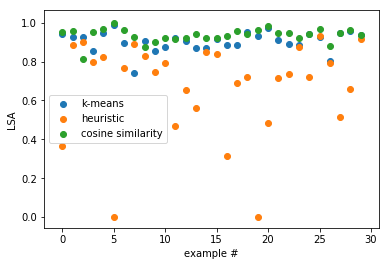

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
kmeans = []
heuristic = []
cossim = []
for i, j, k in softcossimScores:
    kmeans.append(i)
    heuristic.append(j)
    cossim.append(k)
plt.scatter( range(0, 30),kmeans, label='k-means')
plt.scatter(range(0, 30), heuristic, label='heuristic')
plt.scatter(range(0, 30), cossim, label='cosine similarity')
plt.legend()

plt.xlabel('example #')
plt.ylabel('LSA')

In [49]:
unitOverLapScoresForLengthCos = []
unitOverLapScoresForLengthKmeans = []
unitOverLapScoresForLengthHeuristics = []

cosScoresForLengthCos = []
cosScoresForLengthKmeans = []
cosScoresForLengthHeuristics = []

document = firstBatch[0]
vector = document2vec(document)
for i in range(2, 20):
    lengthOfSummary = i
    dictionary = corpora.Dictionary([simple_preprocess(document)])
    similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)
    summary = getSummary(document, lengthOfSummary) 
    summary = sorted(summary, key=summary.__getitem__)
    summaryKmeans = ' '.join(summary)
    summaryCool = _run_article_summary(document, lengthOfSummary)
    summaryCos = summarizeUsingCos(document, lengthOfSummary)
#     softcossimScores.append([softcossim(dictionary.doc2bow(simple_preprocess(summaryKmeans)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix), \
#                              softcossim(dictionary.doc2bow(simple_preprocess(summaryCool)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix), \
#                             softcossim(dictionary.doc2bow(simple_preprocess(summaryCos)), dictionary.doc2bow(simple_preprocess(document)), similarity_matrix)])
    unitOverLapScoresForLengthCos.append([i, unit_overlap(summaryCos, document)])
    unitOverLapScoresForLengthKmeans.append([i, unit_overlap(summaryKmeans, document)])
    unitOverLapScoresForLengthHeuristics.append([i, unit_overlap(summaryCool, document)])
    doc = dictionary.doc2bow(simple_preprocess(document))
    cosScoresForLengthCos.append([i,softcossim(dictionary.doc2bow(simple_preprocess(summaryKmeans)), doc, similarity_matrix)])
    cosScoresForLengthKmeans.append([i, softcossim(dictionary.doc2bow(simple_preprocess(summaryCool)), doc, similarity_matrix)])
    cosScoresForLengthHeuristics.append([i, softcossim(dictionary.doc2bow(simple_preprocess(summaryCos)), doc, similarity_matrix)])
    
    print(i)


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-p

2


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


3


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


4


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


5


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


6


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


7


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


8


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


9


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


10


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


11


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


12


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


13


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


14


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


15


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


16


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


17


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  


18
19


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).


In [50]:
def splitInTwo(initial):
    one = []
    two = []
    for l in initial:
        one.append(l[0])
        two.append(l[1]) 
    return one, two

In [57]:
xy = [unitOverLapScoresForLengthCos,unitOverLapScoresForLengthKmeans,unitOverLapScoresForLengthHeuristics, cosScoresForLengthCos,cosScoresForLengthKmeans,cosScoresForLengthHeuristics]

(2, 20.037956355430715)

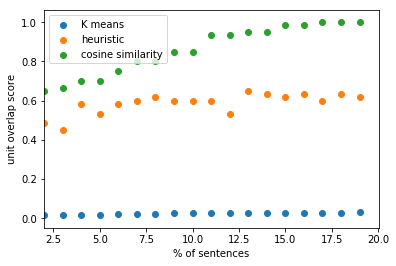

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline


x, y = splitInTwo(unitOverLapScoresForLengthCos)
y = [haba / 32 for haba in y] 
plt.scatter(x, y, label='K means')
x, y = splitInTwo(unitOverLapScoresForLengthKmeans)
plt.scatter(x, y, label='heuristic')
x, y = splitInTwo(unitOverLapScoresForLengthHeuristics)
plt.scatter(x, y, label='cosine similarity')
plt.legend()
plt.xlabel('% of sentences')
# percent sentences
#try to have it 
plt.ylabel('unit overlap score')
plt.xlim(xmin=2)

In [76]:
document = firstBatch[1000]
lengthOfSummary = 2
# dictionary = corpora.Dictionary([simple_preprocess(document)])
# similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

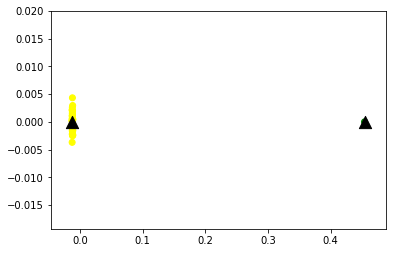

In [77]:
vector = document2vec(document)
summary = getSummary(document, lengthOfSummary) 
summary = sorted(summary, key=summary.__getitem__)
summary = ' '.join(summary)

In [4]:
def getSummary(document, k):

    model= Doc2Vec.load("d2v.model")

    #to find the vector of a document which is not in training data

    kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=1000) 

    X = kmeans_model.fit(vector)

    labels=kmeans_model.labels_.tolist()

    l = kmeans_model.fit_predict(vector)

    pca = PCA(n_components = k).fit(vector)

    datapoint = pca.transform(vector)

#     import matplotlib.pyplot as plt
#     %matplotlib inline
#     plt.figure
#     label1 = ['#FFFF00', '#008000', '#0000FF', '#800080', '#120000', '#001200', '#000012']
#     color = [label1[i] for i in labels]
#     plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
#     plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
#     plt.show()
    summary = {}
    test_data = sent_tokenize(document.lower())
    for c in set(labels):      
        summary[test_data[bestVector(c, datapoint,test_data, centroidpoint, labels)]] = bestVector(c, datapoint, test_data, centroidpoint, labels)
    return summary

In [5]:
def bestVector(c, datapoint, test_data,  centroidpoint, labels):
    closestIndex, distance = 0, float('inf')
    for i in range(len(test_data)):
        if labels[i] == c and sum((datapoint[i] - centroidpoint[c])**2) < distance:
            closestIndex = i
            distance = sum((datapoint[i] - centroidpoint[c])**2)
    return closestIndex

In [6]:
def document2vec(document):
    vector = []
    for sentence in document:
        test_data = word_tokenize(sentence.lower())
        vector.append(model.infer_vector(test_data))
    return vector

In [7]:
def document2vec(document):
    vector = []
    for sentence in sent_tokenize(document):        
        test_data = sent_tokenize(sentence.lower())
        vector.append(model.infer_vector(test_data))
    return vector

In [8]:
def unit_overlap(evaluated_model, reference_model):
    """
    Computes unit overlap of two text documents.
    0 <= overlap <= 1, where 0 means no match and 1 means
    exactly the same.
    """
    terms1 = frozenset(evaluated_model)
    terms2 = frozenset(reference_model)

    if not terms1 and not terms2:
        raise ValueError(
            "Documents can't be empty. Please pass the valid documents.")

    common_terms_count = len(terms1 & terms2)
    return common_terms_count / (len(terms1) + len(terms2) - common_terms_count)


In [48]:
#importing libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import bs4 as BeautifulSoup
import urllib.request  



def _create_dictionary_table(text_string):
   
    #removing stop words
    stop_words = set(stopwords.words("english"))
    
    words = word_tokenize(text_string)
    
    #reducing words to their root form
    stem = PorterStemmer()
    
    #creating dictionary for the word frequency table
    frequency_table = dict()
    for wd in words:
        wd = stem.stem(wd)
        if wd in stop_words:
            continue
        if wd in frequency_table:
            frequency_table[wd] += 1
        else:
            frequency_table[wd] = 1

    return frequency_table


def _calculate_sentence_scores(sentences, frequency_table):   

    #algorithm for scoring a sentence by its words
    sentence_weight = dict()

    for sentence in sentences:
        sentence_wordcount = (len(word_tokenize(sentence)))
        sentence_wordcount_without_stop_words = 0
        for word_weight in frequency_table:
            if word_weight in sentence.lower():
                sentence_wordcount_without_stop_words += 1
                if sentence[:7] in sentence_weight:
                    sentence_weight[sentence[:7]] += frequency_table[word_weight]
                else:
                    sentence_weight[sentence[:7]] = frequency_table[word_weight]

        sentence_weight[sentence[:7]] = sentence_weight[sentence[:7]] / sentence_wordcount_without_stop_words

       

    return sentence_weight

def _calculate_average_score(sentence_weight):
   
    #calculating the average score for the sentences
    sum_values = 0
    for entry in sentence_weight:
        sum_values += sentence_weight[entry]

    #getting sentence average value from source text
    average_score = (sum_values / len(sentence_weight))

    return average_score

def _get_article_summary(sentences, sentence_weight, threshold):
    sentence_counter = 0
    article_summary = ''

    for sentence in sentences:
        if sentence[:7] in sentence_weight and sentence_counter < threshold:
#         and sentence_weight[sentence[:7]] >= (threshold):
            article_summary += " " + sentence
            sentence_counter += 1

    return article_summary

def _run_article_summary(article, sentenceLim):
    
    #creating a dictionary for the word frequency table
    frequency_table = _create_dictionary_table(article)

    #tokenizing the sentences
    sentences = sent_tokenize(article)

    #algorithm for scoring a sentence by its words
    sentence_scores = _calculate_sentence_scores(sentences, frequency_table)

    #getting the threshold
    threshold = _calculate_average_score(sentence_scores)

    #producing the summary
    article_summary = _get_article_summary(sentences, sentence_scores,  sentenceLim)

    return article_summary


# summary_results = _run_article_summary(article_content)
# print(summary_results)

In [10]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import re

# Read the CSV file
import io


def summarizeUsingCos(document, length):
    # split the the text in the articles into sentences
    sentences = []
    sentences.append(sent_tokenize(document))  

    # flatten the list
    sentences = [y for x in sentences for y in x]

    # remove punctuations, numbers and special characters
    clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

    # make alphabets lowercase
    clean_sentences = [s.lower() for s in clean_sentences]


    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')


    # function to remove stopwords
    def remove_stopwords(sen):
        sen_new = " ".join([i for i in sen if i not in stop_words])
        return sen_new

    # remove stopwords from the sentences
    clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

    # Extract word vectors
    word_embeddings = {}
    f = open('glove.6B.100d.txt', encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()

    sentence_vectors = []
    for i in clean_sentences:
        if len(i) != 0:
            v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
        else:
            v = np.zeros((100,))
        sentence_vectors.append(v)



    # The next step is to find similarities among the sentences. We will use cosine similarity to find similarity between a pair of sentences. Let's create an empty similarity matrix for this task and populate it with cosine similarities of the sentences.
    # similarity matrix
    sim_mat = np.zeros([len(sentences), len(sentences)])

    from sklearn.metrics.pairwise import cosine_similarity

    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

    import networkx as nx

    nx_graph = nx.from_numpy_array(sim_mat)
    scores = nx.pagerank(nx_graph)

    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

    # Specify number of sentences to form the summary
    sn = length

    # Generate summary
    summary = []
    for i in range(sn):
        summary.append(ranked_sentences[i][1])
    return ' '.join(summary)

In [18]:
summarizeUsingCos(document, 6)

'But on spending power and standing, the Trump administration may come under pressure from advocates of presidential authority to fight the House no matter their shared views on health care, since those precedents could have broad repercussions. Anticipating that the Trump administration might not be inclined to mount a vigorous fight against the House Republicans given the  ’s dim view of the health care law, a team of lawyers this month sought to intervene in the case on behalf of two participants in the health care program. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. In their request, the lawyers predicted that a deal between House Republicans and the new administration to dismiss or settle the case “will produce devastating consequences for

In [15]:
document = firstBatch[0]